# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import statsmodels.formula.api as smf

from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
tips = load_dataset(name='tips')

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips = tips[tips['tip_pct']<.5]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [3]:
reg_tip = smf.ols(formula='tip ~ net_bill', 
                  data=tips
                 ).fit()

reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.41e-25
Time:                        11:39:00   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
tips['tip_predict'] = round(reg_tip.predict(tips),2)
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_predict
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,2.89
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.13
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.05
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.35
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.41
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,3.63
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,3.85
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,3.38
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,2.90


(0.0, 10.5)

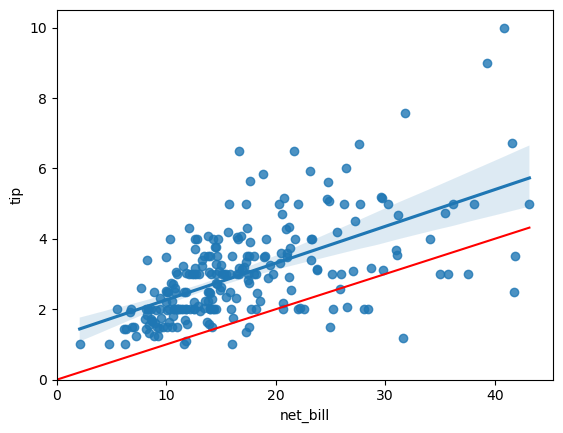

In [5]:
#Gráfico de Dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

#Gerando gráficos para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

#Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [6]:
reg_tip_pct = smf.ols(formula='tip_pct ~ net_bill', 
                  data=tips
                 ).fit()

reg_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.31e-12
Time:                        11:39:17   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
tips['tip_pct_predict'] = reg_tip_pct.predict(tips)

In [8]:
tips[['net_bill','tip','tip_predict','tip_pct','tip_pct_predict']]

,net_bill,tip,tip_predict,tip_pct,tip_pct_predict
0,15.98,1.01,2.89,0.063204,0.194125
1,8.68,1.66,2.13,0.191244,0.221392
2,17.51,3.50,3.05,0.199886,0.188410
3,20.37,3.31,3.35,0.162494,0.177727
4,20.98,3.61,3.41,0.172069,0.175448
...,...,...,...,...,...
239,23.11,5.92,3.63,0.256166,0.167492
240,25.18,2.00,3.85,0.079428,0.159760
241,20.67,2.00,3.38,0.096759,0.176606
242,16.07,1.75,2.90,0.108899,0.193789


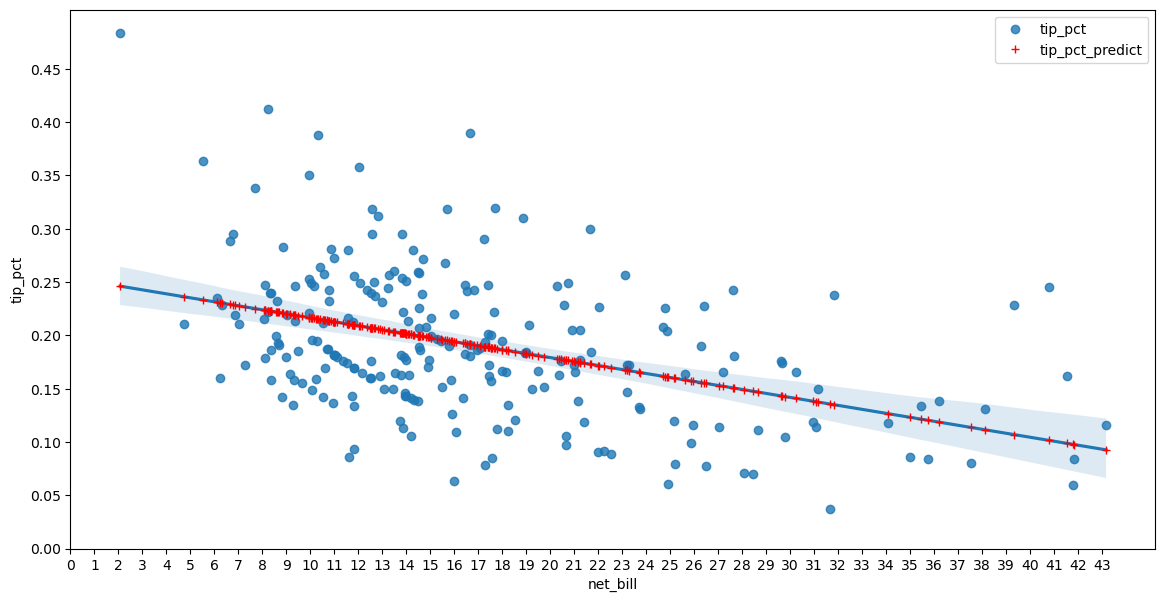

In [9]:
#Gráfico de Dispersão
plt.figure(figsize=(14,7))

sns.regplot(x='net_bill', y='tip_pct', data=tips, label='tip_pct')
plt.plot(tips['net_bill'], tips['tip_pct_predict'], 'r+', label='tip_pct_predict')

plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xticks(ticks=np.arange(stop=tips['net_bill'].max(), step=1))
plt.yticks(ticks=np.arange(stop=tips['tip_pct'].max(), step=.05))

plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Observa-se nos dois gráficos que a maior parte das observações se agrupa nos menores valores líquidos da conta. Em outras palavras, à medida que o valor da conta aumenta, a quantidade de dados diminui. A interpretação do primeiro gráfico de dispersão contrasta com a do segundo ao apontar uma correlação positiva. Isso implica que conforme os valores de net_bill aumentam, os valores de tip também tendem a aumentar. Por outro lado, a análise do segundo gráfico indica uma correlação inversa ou negativa entre net_bill e tip_pct, sugerindo que à medida que net_bill aumenta, tip_pct tende a diminuir. Embora ambos os modelos exibam um coeficiente de determinação 𝑅² baixo, o primeiro modelo se ajusta melhor aos dados, permitindo uma predição mais precisa do que o segundo modelo.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [10]:
#Obtendo o valor predito "pred" para "tip_pct"
reg_tip_pct.fittedvalues

0      0.194125
1      0.221392
2      0.188410
3      0.177727
4      0.175448
         ...   
239    0.167492
240    0.159760
241    0.176606
242    0.193789
243    0.194872
Length: 242, dtype: float64

In [11]:
#Obtenha o valor predito para tip como "tip_pct" * "net_bill"
reg_tip_pct.fittedvalues * tips.net_bill

0      3.102114
1      1.921686
2      3.299055
3      3.620296
4      3.680906
         ...   
239    3.870744
240    4.022759
241    3.650452
242    3.114183
243    3.075078
Length: 242, dtype: float64

In [12]:
#Calcule o  𝑅²  do modelo para "tip"
r2 = r2_score(y_true=tips['tip'], 
              y_pred=reg_tip_pct.fittedvalues * tips.net_bill)

print("Coeficiente de determinação (𝑅2) do modelo para tip:", r2)

Coeficiente de determinação (𝑅2) do modelo para tip: 0.3503553432251354


In [13]:
#Compare esse R² com o do item 1

print('Coeficiente de determinação (𝑅²) dos valores preditos para `tip` como tip_pct(predict) * net_bill:', 
      round(r2 * 100, 2), '%')

print('Coeficiente de determinação (𝑅²) do modelo `reg_tip`, ou seja, do modelo 1:', 
      round(reg_tip.rsquared * 100, 2), '%')

print('Coeficiente de determinação (𝑅²) do modelo `reg_tip_pct`, ou seja, do modelo 2:', 
      round(reg_tip_pct.rsquared * 100, 2), '%')

Coeficiente de determinação (𝑅²) dos valores preditos para `tip` como tip_pct(predict) * net_bill: 35.04 %
Coeficiente de determinação (𝑅²) do modelo `reg_tip`, ou seja, do modelo 1: 36.35 %
Coeficiente de determinação (𝑅²) do modelo `reg_tip_pct`, ou seja, do modelo 2: 18.95 %
